In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [166]:
CH_data = pd.read_fwf("C:/Users/willi/Desktop/Savin Group/rate_CH.txt", widths = [13, 13, 13, 13])

CH2_data = pd.read_fwf("C:/Users/willi/Desktop/Savin Group/rate_CH2.txt", widths = [13, 13, 13, 13])
# 'voltage' 'energy' 'rate' 'uncertainty

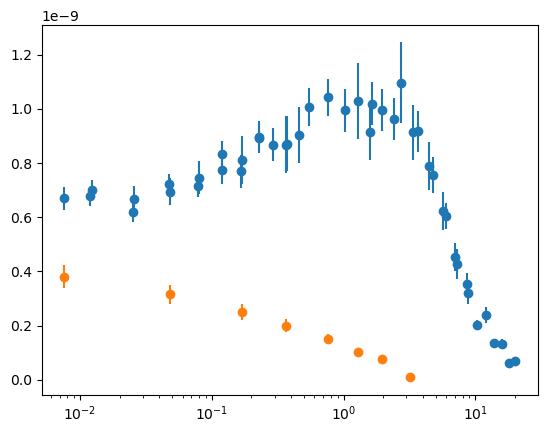

In [167]:
plt.errorbar(CH_data['energy'], CH_data['rate'], yerr = CH_data['uncertainty'], fmt="o")
plt.errorbar(CH2_data['energy'], CH2_data['rate'], yerr = CH2_data['uncertainty'], fmt="o")
plt.xscale("log")

In [175]:
def cross_sectionCH(E, a_0, a_12, b_2, b_4):
    b_1 = 0
    upper = a_0 + (a_12*np.sqrt(E))
    lower = (E**(-2/3)) + (b_1*(E)) + (b_2*(E**2)) + (b_4*(E**4))
    cs = upper/lower
    return cs
def cross_sectionCH2(E, a_0, b_1, b_2, b_4):
    a_12 = 0
    upper = a_0 + (a_12*np.sqrt(E))
    lower = (E**(-2/3)) + (b_1*(E)) + (b_2*(E**2)) + (b_4*(E**4))
    cs = upper/lower
    return cs

In [176]:
guessCH = [2.3474E-16, 1.1028E-15, 1.4694E-01, 2.0471E-03]
poptCH, pcovCH = optimize.curve_fit(cross_sectionCH, CH_data['energy'], CH_data['rate'], sigma = CH_data['uncertainty'], p0 = guessCH, method="lm")
perrCH = np.sqrt(np.diag(pcovCH))
poptCH

array([ 9.51022829e-09, -1.68852680e-08, -2.06348905e+01,  3.14855557e+00])

In [177]:
energiesCH = np.logspace(np.log10(min(CH_data['energy'])), np.log10(max(CH_data['energy'])), 1000)
fitCH = [cross_sectionCH(energyCH, 2.3474E-16, 1.1028E-15, 1.4694E-01, 2.0471E-03) for energyCH in energiesCH]
#fitCH = [cross_sectionCH(energyCH, poptCH[0], poptCH[1], poptCH[2], poptCH[3]) for energyCH in energiesCH]

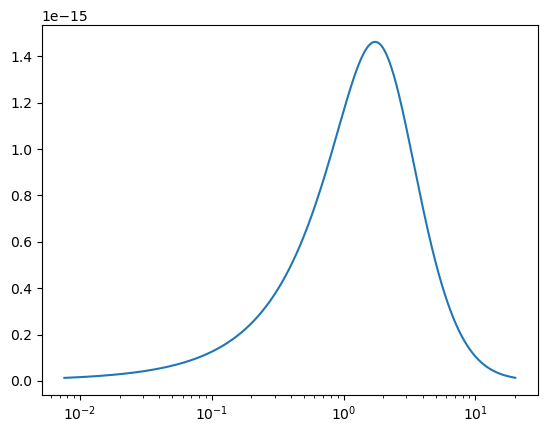

In [178]:
#plt.errorbar(CH_data['energy'], CH_data['rate'], yerr = CH_data['uncertainty'], fmt="o")
plt.plot(energiesCH, fitCH)
plt.xscale("log")

In [179]:
#guessCH2 = [1.9983E-16, 0, 5.4737E-02, 5.6944E-03, 2.2891E-01]
poptCH2, pcovCH2 = optimize.curve_fit(cross_section, CH2_data['energy'], CH2_data['rate'], sigma = CH2_data['uncertainty'], maxfev=10000, ftol = 1e-10)
perrCH2 = np.sqrt(np.diag(pcovCH2))
poptCH2

array([-2.41828225e-11,  5.66984366e-10,  3.70002193e+00, -1.59320736e+00,
        8.16918515e-01])

In [183]:
energiesCH2 = np.logspace(np.log10(min(CH2_data['energy'])), np.log10(max(CH2_data['energy'])), 1000)
fitCH2 = [cross_section(energyCH2, poptCH2[0], poptCH2[1], poptCH2[2], poptCH2[3], poptCH2[4]) for energyCH2 in energiesCH2]
fitCH2 = [cross_section(energyCH2, 1.9983E-16, 0, 5.4737E-02, 5.6944E-03, 2.2891E-01) for energyCH2 in energiesCH2]

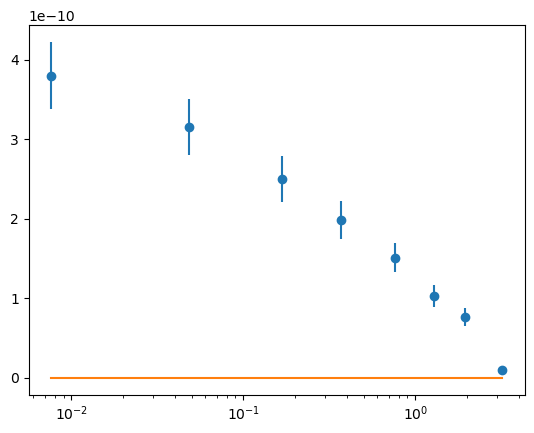

In [184]:
#plt.errorbar(CH2_data['energy'], CH2_data['rate'], yerr = CH2_data['uncertainty'], fmt="o")
plt.plot(energiesCH2, fitCH2)
plt.xscale("log")

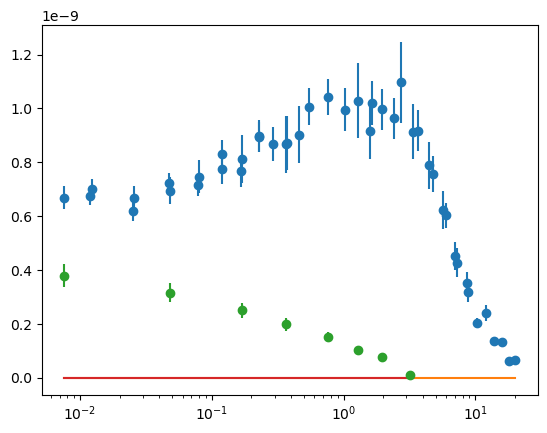

In [185]:
plt.errorbar(CH_data['energy'], CH_data['rate'], yerr = CH_data['uncertainty'], fmt="o")
plt.plot(energiesCH, fitCH)
plt.errorbar(CH2_data['energy'], CH2_data['rate'], yerr = CH2_data['uncertainty'], fmt="o")
plt.plot(energiesCH2, fitCH2)
plt.xscale("log")